In [1]:
import numpy as np
import pandas as pd 
df=pd.read_csv('delivery_time.csv')
df.shape

(21, 2)

In [2]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


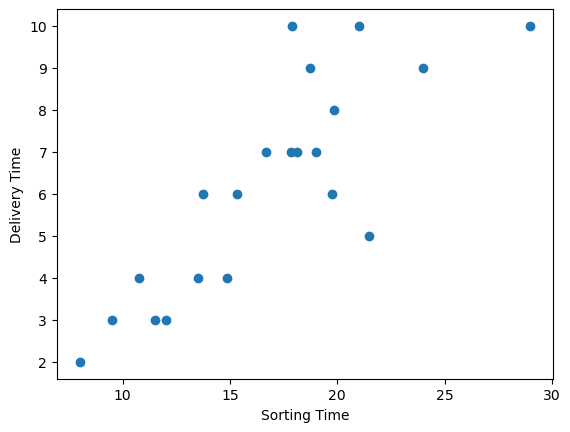

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df["Delivery Time"],df["Sorting Time"])
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

In [5]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [6]:
y=df[["Delivery Time"]]
x=df[["Sorting Time"]]

In [7]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [8]:
LR.fit(x,y)

LinearRegression()

In [9]:
#B0 
print("Intercept value:",LR.intercept_)
#B1
print("Coeffient value:",LR.coef_)

Intercept value: [6.58273397]
Coeffient value: [[1.6490199]]


In [10]:
y_pred=LR.predict(x)
y_pred

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

In [11]:
y

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [12]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y,y_pred)
print("Mean square error:",mse.round(2))

Mean square error: 7.79


In [13]:
RMSE=np.sqrt(mse)
print("Root mean square error:",RMSE.round(2))

Root mean square error: 2.79


In [21]:
r2= r2_score(y,y_pred)
print("r2 score:",r2.round(2))

r2 score: 0.68


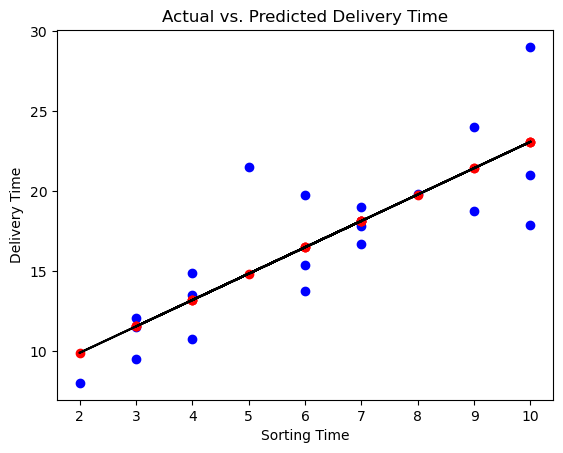

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df['Sorting Time'], df['Delivery Time'], color='blue', label='Actual Delivery Time')
plt.scatter(df['Sorting Time'],y_pred, color='red', label='Predicted Delivery Time')
plt.plot(df['Sorting Time'],y_pred,color="black")
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Actual vs. Predicted Delivery Time')
plt.show()

In [17]:
y_pred

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

In [22]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_x = SS.fit_transform(x)
SS_x = pd.DataFrame(SS_x)
SS_x.columns = list(x)
SS_x.head()

,Sorting Time
0,1.535625
1,-0.882984
2,-0.076781
3,1.132523
4,1.535625


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(SS_x,y, test_size=0.30)

# model fitting
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X_train,Y_train)
Y_pred_train = LR.predict(X_train)
Y_pred_test = LR.predict(X_test)

from sklearn.metrics import mean_squared_error
er1 = np.sqrt(mean_squared_error(Y_train,Y_pred_train))
er2 = np.sqrt(mean_squared_error(Y_test,Y_pred_test))
print("Training Error: ", er1.round(2))
print("Testing Error: ", er2.round(2))

Training Error:  3.27
Testing Error:  1.52


In [24]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
from sklearn.model_selection import train_test_split

training_error = []
test_error = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(SS_x,y, test_size = 0.30,random_state = i)
    LR.fit(X_train,Y_train)
    Y_pred_train = LR.predict(X_train)
    Y_pred_test = LR.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))
    
    
print("Cross Validation Training error:",np.mean(training_error).round(2))
print("Cross validation Tests error:",np.mean(test_error).round(2))

Cross Validation Training error: 2.69
Cross validation Tests error: 3.09


In [25]:
y_pred

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])